In [1]:
#Importing modules as needed 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as sts
from datetime import date

In [26]:
# Calling in necassary data for pwoer plants 
power_plants_csv = pd.read_csv('Global Power Plant.csv')
#Thanks to dbouquin for compuling the data for this https://github.com/dbouquin/IS_608
world_countries_source_A = pd.read_csv('Countries-Continents.csv')
power_plants_source = power_plants_csv.rename(columns = {'Capacity (MW)': 'Capacity'})
world_countries_source = world_countries_source_A
#power_plants_source

In [3]:
# Total number of power plants
counting_of_pp = power_plants_source['Country'].count()
print(counting_of_pp)

29910


In [4]:
#Totaling of power in gas and solar sectors
USA = power_plants_source.loc[(power_plants_source["Country"] == 'United States of America')]
#print(USA['Primary Fuel'].value_counts())Solar')]
USA_gas = power_plants_source.loc[(power_plants_source["Country"] == 'United States of America') & (power_plants_source["Primary Fuel"] == 'Gas')]
USA_solar= power_plants_source.loc[(power_plants_source["Country"] == 'United States of America') & (power_plants_source["Primary Fuel"] == 'Solar')]
#USA['Country'].count()
print(USA['Capacity'].sum())

1193616.45


In [5]:
#Comparing the totals of gas and solar
solar_output_total = USA_solar['Capacity'].sum()
gas_output_total = USA_gas['Capacity'].sum()
Comparison_of_power = gas_output_total / solar_output_total
txt1 = " Solar power is produced at a total of  {Solar} and gas produces on total  {Gas}. All of which is measured in MW. Gas produces {multiple} times more energy than solar in the US.".format(Solar = solar_output_total, Gas = gas_output_total, multiple = Comparison_of_power)
print(txt1)

 Solar power is produced at a total of  27369.85 and gas produces on total  525687.8999999999. All of which is measured in MW. Gas produces 19.20682429753908 times more energy than solar in the US.


In [6]:
#Clean Energy tables
USA_hydro= power_plants_source.loc[(power_plants_source["Country"] == 'United States of America') & (power_plants_source["Primary Fuel"] == 'Hydro')]
USA_wind = power_plants_source.loc[(power_plants_source["Country"] == 'United States of America') & (power_plants_source["Primary Fuel"] == 'Wind')]
USA_nuclear = power_plants_source.loc[(power_plants_source["Country"] == 'United States of America') & (power_plants_source["Primary Fuel"] == 'Nuclear')]
USA_geothermal = power_plants_source.loc[(power_plants_source["Country"] == 'United States of America') & (power_plants_source["Primary Fuel"] == 'Geothermal')]
USA_biomass = power_plants_source.loc[(power_plants_source["Country"] == 'United States of America') & (power_plants_source["Primary Fuel"] == 'Biomass')]
USA_waste = power_plants_source.loc[(power_plants_source["Country"] == 'United States of America') & (power_plants_source["Primary Fuel"] == 'Waste')]
#USA['Country'].count()

In [7]:
# Adding all of the clean energy 
hydro_sum = USA_hydro['Capacity'].sum()
wind_sum = USA_wind['Capacity'].sum()
nuclear_sum = USA_nuclear['Capacity'].sum()
geothermal_sum = USA_geothermal['Capacity'].sum()
biomass_sum = USA_biomass['Capacity'].sum()
waste_sum = USA_waste['Capacity'].sum()
clean_total = hydro_sum + wind_sum + nuclear_sum + geothermal_sum + biomass_sum + waste_sum + solar_output_total
print(clean_total) 

342888.75


In [27]:
# Adding the remainder of dirty energy
USA_coal= power_plants_source.loc[(power_plants_source["Country"] == 'United States of America') & (power_plants_source["Primary Fuel"] == 'Coal')]
USA_oil= power_plants_source.loc[(power_plants_source["Country"] == 'United States of America') & (power_plants_source["Primary Fuel"] == 'Oil')]
#-------------------------------------------------
coal_sum = USA_coal['Capacity'].sum()
oil_sum =USA_oil['Capacity'].sum()
dirty_power = coal_sum + oil_sum + gas_output_total
power_output_comparison = dirty_power / clean_total
print('The power difference between dirty and clean power output is roughly {total_energies} times. In favor of dirty power.'. format(total_energies = power_output_comparison))

The power difference between dirty and clean power output is roughly 2.467640889355512 times. In favor of dirty power.


In [9]:
all_power_sum = power_plants_source['Capacity'].sum()


In [10]:
# Setting up for grabbing each continent starting with Africa
africa = world_countries_source.loc[(world_countries_source["Continent"] == 'Africa')]
african_countries = list(africa['Country'])

In [11]:
country_name = []
capacity_amount= []
#print(power_plants_source.keys())

for country in african_countries:
    country_test = power_plants_source.loc[(power_plants_source['Country'] == country)]
    country_name.append(country_test['Country'])
    capacity_amount.append(country_test['Capacity'])
#print(country_name)

In [12]:
# African countries and their capacties
capacity_continent = power_plants_source[['Country' , 'Capacity']]
african_names = {
    'Country' : african_countries
}
africa_country = pd.DataFrame(african_names)
power_capacity = pd.DataFrame(capacity_continent)
africa_merge = pd.merge(power_capacity, africa_country, how = 'right')
clean_africa_merge = africa_merge.dropna()

In [13]:
North_America = world_countries_source.loc[(world_countries_source["Continent"] == 'North America')]
North_America_countries = list(North_America['Country'])
north_ameroca_name = {
    'Country' : North_America_countries
}
NA_country = pd.DataFrame(north_ameroca_name)
na_rename = NA_country.replace({'US' : "United States of America"})
na_merge = pd.merge(power_capacity, na_rename, how = 'right')     
clean_na_merge= na_merge.dropna()
#na_merge

In [14]:
South_America = world_countries_source.loc[(world_countries_source["Continent"] == 'South America')]
South_America_countries = list(South_America['Country'])
south_ameroca_name = {
    'Country' : South_America_countries
}
SA_country = pd.DataFrame(south_ameroca_name)
power_capacity = pd.DataFrame(capacity_continent)
sa_merge = pd.merge(power_capacity, SA_country, how = 'right')     
clean_sa_merge = sa_merge.dropna()
#sa_merge

In [15]:
europe = world_countries_source.loc[(world_countries_source["Continent"] == 'Europe')]
europe_countries = list(europe['Country'])
europe_names = {
    'Country' : europe_countries
}
europe_country = pd.DataFrame(europe_names)
europe_merge = pd.merge(power_capacity, europe_country, how = 'right')
clean_europe_merge = europe_merge.dropna()
#clean_europe_merge

In [16]:
asia = world_countries_source.loc[(world_countries_source["Continent"] == 'Asia')]
asia_countries = list(asia['Country'])
asia_names = {
    'Country' : asia_countries
}
asia_country = pd.DataFrame(asia_names)
# Needed to change names to make sure both data files have the same countries names to make sure
# all plants are known and represented. Some countries do have different names on each CSV
# more than 95% of the plants are present
asia_merge_rename = asia_country.replace({'Korea, North': 'North Korea', 
                                          'Korea, South': 'South Korea',
                                          'Russian Federation': 'Russia',
                                          'Syria': 'Syrian Arab Republic',
                                          'Brunei':  'Brunei Darussalam'})
asia_merge = pd.merge(power_capacity, asia_merge_rename, how = 'right')
clean_asia_merge = asia_merge.dropna()
#asia_merge

In [17]:
oceania = world_countries_source.loc[(world_countries_source["Continent"] == 'Oceania')]
oceania_countries = list(oceania['Country'])
oceania_names = {
    'Country' : oceania_countries
}
oceania_country = pd.DataFrame(oceania_names)
oceania_merge = pd.merge(power_capacity, oceania_country, how = 'right')
clean_oceania_merge = oceania_merge.dropna()


In [28]:
#print(power_plants_source['Country'].unique())
#print(oceania_names)
#print('Marshall Islands ,Micronesia, Nauru, Palau, ''Palau'', ''Papua' 'New Guinea'', ''Samoa'', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu''')

In [29]:
africa_total_power = clean_africa_merge['Capacity'].sum()
na_total_power = clean_na_merge['Capacity'].sum()
sa_total_power = clean_sa_merge['Capacity'].sum()
asia_total_power = clean_asia_merge['Capacity'].sum()
europe_total_power = clean_europe_merge['Capacity'].sum()
oceania_total_power = clean_oceania_merge['Capacity'].sum()

#Continental power contributions 
cont_africa = africa_total_power/all_power_sum
cont_na = na_total_power/all_power_sum
cont_sa = sa_total_power/all_power_sum
cont_asia = asia_total_power/all_power_sum
cont_europe = europe_total_power/all_power_sum
cont_oceania = oceania_total_power/all_power_sum

([<matplotlib.patches.Wedge at 0x2260fe04fd0>,
 [Text(-0.09638364081316268, 1.0957692246926811, 'Afroca'),
  Text(-1.0783298264003107, -0.21726662305903258, 'Asia'),
  Text(0.6925656070265825, -0.8546068569604981, 'Europe'),
  Text(1.0227654497630496, 0.4049084276364066, 'North America'),
  Text(0.5400234420330808, 1.5061124400438182, 'Oceania'),
  Text(0.3164823903499898, 2.0760151484510794, 'South America')],
 [Text(-0.05257289498899782, 0.597692304377826, '2.8%'),
  Text(-0.5881799053092603, -0.11850906712310866, '50.7%'),
  Text(0.3777630583781359, -0.4661491947057262, '14.6%'),
  Text(0.5578720635071178, 0.22085914234713086, '25.7%'),
  Text(0.3712661163977431, 1.035452302530125, '1.3%'),
  Text(0.2411294402666589, 1.5817258273912986, '4.8%')])

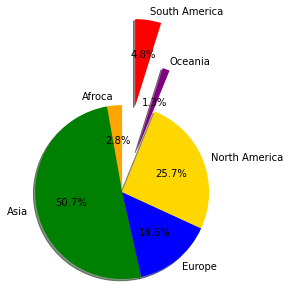

In [20]:
continent_power = [africa_total_power, asia_total_power, europe_total_power, na_total_power, oceania_total_power, sa_total_power]
# Labels for the sections of our pie chart
labels = ["Afroca", "Asia", "Europe", "North America" , "Oceania", "South America"]

# The colors of each section of the pie chart
colors = ["orange", "green", "blue", "gold" , "purple" , "red"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0, 0, 0, 0.5, 1 )
plt.pie(continent_power,  labels=labels, colors=colors,explode = explode, 
        autopct="%1.1f%%", shadow=True, startangle=90)

In [21]:
total_rename_df =  world_countries_source.replace({'Korea, North': 'North Korea', 
                                          'Korea, South': 'South Korea',
                                          'Russian Federation': 'Russia',
                                          'Syria': 'Syrian Arab Republic',
                                          'Brunei':  'Brunei Darussalam',
                                          'US' : "United States of America"})
total_merge = pd.merge(power_plants_source, total_rename_df)
total_clean = total_merge.dropna(subset=['Continent'])
total_clean['Primary Fuel'].unique()

array(['Hydro', 'Gas', 'Other', 'Oil', 'Nuclear', 'Coal', 'Solar', 'Wind',
       'Waste', 'Biomass', 'Wave and Tidal', 'Petcoke', 'Geothermal',
       'Cogeneration', 'Storage'], dtype=object)

In [22]:
query_country = ('China')
test_query = total_clean.query("Country in @query_country")

query_hydro_lock =  test_query.loc[(test_query['Primary Fuel'] == 'Hydro')]

plant_types = list(total_clean['Primary Fuel'].unique())
for plant in plant_types:
    hydro_lock =  test_query.loc[(test_query['Primary Fuel'] == plant)]
    query_total = hydro_lock['Primary Fuel'].count()
    print(f'There is a total number of {query_total} {plant} plants in the filtered countires. ')


There is a total number of 947 Hydro plants in the filtered countires. 
There is a total number of 170 Gas plants in the filtered countires. 
There is a total number of 0 Other plants in the filtered countires. 
There is a total number of 5 Oil plants in the filtered countires. 
There is a total number of 12 Nuclear plants in the filtered countires. 
There is a total number of 946 Coal plants in the filtered countires. 
There is a total number of 124 Solar plants in the filtered countires. 
There is a total number of 835 Wind plants in the filtered countires. 
There is a total number of 0 Waste plants in the filtered countires. 
There is a total number of 0 Biomass plants in the filtered countires. 
There is a total number of 0 Wave and Tidal plants in the filtered countires. 
There is a total number of 0 Petcoke plants in the filtered countires. 
There is a total number of 2 Geothermal plants in the filtered countires. 
There is a total number of 0 Cogeneration plants in the filtered 

In [23]:
for i in plant_types:
    hydro_lock =  test_query.loc[(test_query['Primary Fuel'] == i)]
    query_sum = hydro_lock['Capacity'].sum()
    print(f'From the filtered countries {i} plants produce {query_sum} MW')

From the filtered countries Hydro plants produce 259025.59999999998 MW
From the filtered countries Gas plants produce 59774.5 MW
From the filtered countries Other plants produce 0.0 MW
From the filtered countries Oil plants produce 1329.0 MW
From the filtered countries Nuclear plants produce 33402.0 MW
From the filtered countries Coal plants produce 955718.0 MW
From the filtered countries Solar plants produce 3017.2200000000003 MW
From the filtered countries Wind plants produce 50990.36 MW
From the filtered countries Waste plants produce 0.0 MW
From the filtered countries Biomass plants produce 0.0 MW
From the filtered countries Wave and Tidal plants produce 0.0 MW
From the filtered countries Petcoke plants produce 0.0 MW
From the filtered countries Geothermal plants produce 26.1 MW
From the filtered countries Cogeneration plants produce 0.0 MW
From the filtered countries Storage plants produce 0.0 MW


In [24]:
current_county_sum = test_query["Capacity"].sum()
percents_power = []
countries_for_percent = []

for average in plant_types:
    hydro_lock =  test_query.loc[(test_query['Primary Fuel'] == average)]
    query_percent = hydro_lock['Capacity'].sum() / current_county_sum * 100
    #print(f'{average} plants makeup about  {query_percent} percent of the power output')
    percents_power.append(query_percent)
    countries_for_percent.append(average)

chart_dict = {
    "Types": countries_for_percent,
    "Capacity": percents_power
}

pie_chart_y = pd.DataFrame(chart_dict)
query_for_chart_low = pie_chart_y.query('Capacity <= 3')
query_for_chart_high = pie_chart_y.query('Capacity >= 3')
sum_for_lower_other = query_for_chart_low['Capacity'].sum()
types_for_low = list(query_for_chart_low['Types'])
chart_high_value_types = list(query_for_chart_high["Types"])
chart_high_value_capacity = list(query_for_chart_high["Capacity"])
#print(chart_high_value_types)
chart_dict_part_2 = {
    "Types" : types_for_low, 
    "Capacity":  sum_for_lower_other
}

test_part_2 = query_for_chart_high.append(chart_dict_part_2, ignore_index = True)
test_part_2

,Types,Capacity
0,Hydro,19.000137
1,Gas,4.384600
2,Coal,70.104164
3,Wind,3.740263
4,"[Other, Oil, Nuclear, Solar, Waste, Biomass, W...",2.770835


([<matplotlib.patches.Wedge at 0x2261004e8d0>,
 [Text(-1.2365912542458166, 1.819571946893763, 'Hydro'),
  Text(-2.1373423221031023, 0.521313531521023, 'Gas'),
  Text(1.1123649825489546, -1.898063261748371, 'Coal'),
  Text(0.6324683820656549, 2.1071268935892906, 'Wind'),
  Text(0.1912647701095961, 2.191670090984253, "['Other', 'Oil', 'Nuclear', 'Solar', 'Waste', 'Biomass', 'Wave and Tidal', 'Petcoke', 'Geothermal', 'Cogeneration', 'Storage']")],
 [Text(-0.674504320497718, 0.9924937892147796, '19.0%'),
  Text(-1.16582308478351, 0.2843528353751034, '4.4%'),
  Text(0.6067445359357932, -1.0353072336809295, '70.1%'),
  Text(0.3449827538539935, 1.1493419419577948, '3.7%'),
  Text(0.10432623824159787, 1.1954564132641379, '2.8%')])

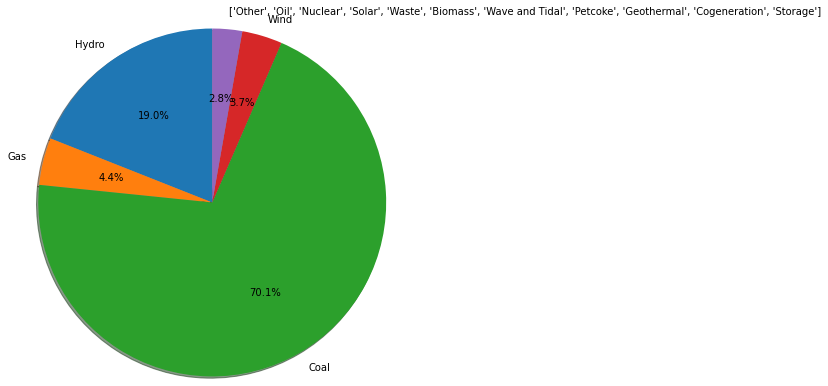

In [25]:
#colors = ["orange", "green", "blue", "gold" , "purple" , "red"]

# Tells matplotlib to seperate the "Humans" section from the others
#explode2 = (0, 0, 0.25, 0, 0 , 0 , 0.25)
plt.pie(test_part_2['Capacity'],  labels=test_part_2['Types'], 
        autopct="%1.1f%%", shadow=True,  radius = 2, startangle=90)